In [1]:
import numpy as np
import matplotlib.pyplot as plt
import RestrictedBoltzmannMachine as RBM

(60000, 784)


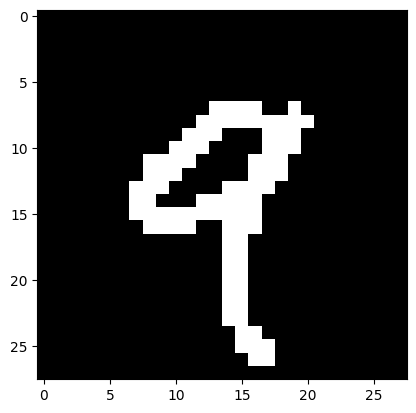

In [2]:
data = None
with open("train-images.idx3-ubyte", "rb") as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data = (data > 128).astype(np.uint8)
print(data.shape)

validation_data = None
with open("t10k-images.idx3-ubyte", "rb") as f:
    validation_data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

validation_data = (validation_data > 128).astype(np.uint8)

img = data[4].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

In [3]:
my_rbm = RBM.RestrictedBoltzmannMachine(28*28, 1000)

In [4]:
my_rbm.contrastive_divergence(data, validation_data, num_epochs=30)

(60000, 784)
Epoch: 0
current_weight_diff: 12.788186490968434
sqrd_recon_error: 0.27290816326530615


Error: You must call wandb.init() before wandb.log()

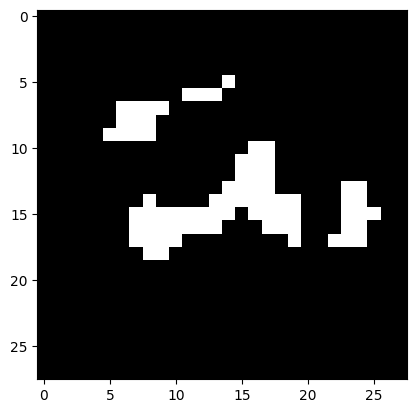

In [ ]:
out = my_rbm.gibbs_sample_v(np.random.rand(28*28, 1), 100)
out = out.astype(np.uint8)
out = out * 253
img = out.reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

In [ ]:


import RestrictedBoltzmannMachine as RBM
data2 = None
with open("t10k-images.idx3-ubyte", "rb") as f:
    data2 = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data2 = (data2 > 128).astype(np.uint8)

myin = data[np.random.randint(0,60000)]
inimg = myin.reshape(28,28).copy()
plt.imshow(inimg, cmap='gray')
plt.show()
inimg[14:, :] = 0
plt.imshow(inimg, cmap='gray')
plt.show()

out = my_rbm.gibbs_sample_v(np.matrix(inimg.reshape(1, 28*28)).T, 100)
for i in range(0, 100):
    out += my_rbm.gibbs_sample_v(np.matrix(inimg.reshape(1, 28*28)).T, 100)

out = out.astype(np.uint8)
img = out.reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

NameError: name 'np' is not defined

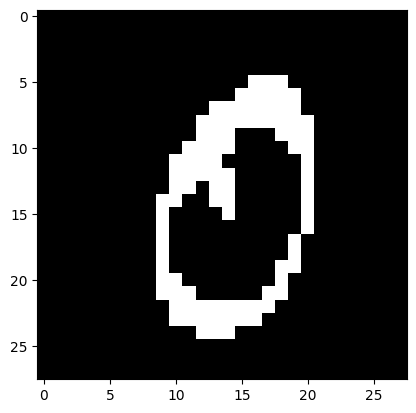

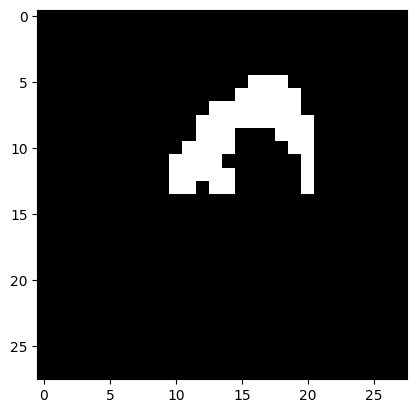

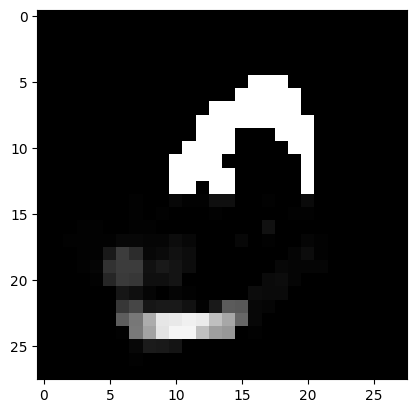

In [ ]:
data2 = None
with open("t10k-images.idx3-ubyte", "rb") as f:
    data2 = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data2 = (data2 > 128).astype(np.uint8)

myin = data[np.random.randint(0,60000)]
inimg = myin.reshape(28,28).copy()
plt.imshow(inimg, cmap='gray')
plt.show()
inimg[14:, :] = 0
plt.imshow(inimg, cmap='gray')
plt.show()

out = my_rbm.conditional_gibbs_sample(np.matrix(inimg.reshape(1, 28*28)).T, 1)
for i in range(0, 100):
    out += my_rbm.conditional_gibbs_sample(np.matrix(inimg.reshape(1, 28*28)).T, 100)

out = out.astype(np.uint8)
img = out.reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image